<a href="https://colab.research.google.com/github/manojgupta3051994/MachineHack_Hackathon_Projects/blob/main/House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [38]:
data = pd.read_csv('Train.csv')

In [39]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [40]:
data.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [42]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UNDER_CONSTRUCTION,29451.0,0.179756,3.839908e-01,0.000000,0.000000,0.000000,0.000000,1.000000e+00
RERA,29451.0,0.317918,4.656753e-01,0.000000,0.000000,0.000000,1.000000,1.000000e+00
BHK_NO.,29451.0,2.392279,8.790913e-01,1.000000,2.000000,2.000000,3.000000,2.000000e+01
SQUARE_FT,29451.0,19802.170190,1.901335e+06,3.000000,900.021130,1175.056750,1550.688124,2.545455e+08
READY_TO_MOVE,29451.0,0.820244,3.839908e-01,0.000000,1.000000,1.000000,1.000000,1.000000e+00
RESALE,29451.0,0.929578,2.558613e-01,0.000000,1.000000,1.000000,1.000000,1.000000e+00
LONGITUDE,29451.0,21.300255,6.205306e+00,-37.713008,18.452663,20.750000,26.900926,5.991288e+01
LATITUDE,29451.0,76.837695,1.055775e+01,-121.761248,73.798100,77.324137,77.828740,1.529627e+02
TARGET(PRICE_IN_LACS),29451.0,142.898746,6.568807e+02,0.250000,38.000000,62.000000,100.000000,3.000000e+04


In [43]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [44]:
data['Area_Per_Room'] = data['SQUARE_FT']/data['BHK_NO.']

In [45]:
def special_char(text):
  n = re.sub("[^a-zA-Z]"," ",text)
  return n

In [46]:
data['ADDRESS'] = data['ADDRESS'].apply(lambda x:special_char(x))

In [47]:
def City(text):
  c = text.split()[-1]
  return c

In [48]:
data['City'] = data['ADDRESS'].apply(lambda x: City(x))

In [49]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Area_Per_Room,City
0,Owner,0,0,2,BHK,1300.236407,1,1,Ksfc Layout Bangalore,12.969910,77.597960,55.0,650.118204,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,Vishweshwara Nagar Mysore,12.274538,76.644605,51.0,637.500000,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,Jigani Bangalore,12.778033,77.632191,43.0,466.579861,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,Sector Vaishali Ghaziabad,28.642300,77.344500,62.5,464.960571,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,New Town Kolkata,22.592200,88.484911,60.5,499.504623,Kolkata


In [50]:
data.drop('ADDRESS',1,inplace=True)

In [51]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Area_Per_Room,City
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,650.118204,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,637.500000,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,466.579861,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,464.960571,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,499.504623,Kolkata


In [52]:
j = data.groupby('City')['TARGET(PRICE_IN_LACS)'].mean()

In [53]:
data['City_New'] = data['City'].map(j)
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Area_Per_Room,City,City_New
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,650.118204,Bangalore,162.827783
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,637.500000,Mysore,62.353488
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,466.579861,Bangalore,162.827783
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,464.960571,Ghaziabad,54.406964
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,499.504623,Kolkata,99.807080


In [54]:
data.replace(to_replace=['Dealer','Owner','Builder'],value=[0,1,2],inplace=True)
data.replace(to_replace=['BHK','RK'],value=[0,1],inplace=True)

In [55]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Area_Per_Room,City,City_New
0,1,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0,650.118204,Bangalore,162.827783
1,0,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0,637.500000,Mysore,62.353488
2,1,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0,466.579861,Bangalore,162.827783
3,1,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5,464.960571,Ghaziabad,54.406964
4,0,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5,499.504623,Kolkata,99.807080


In [56]:
data.drop('City',1,inplace=True)

In [57]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Area_Per_Room,City_New
0,1,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0,650.118204,162.827783
1,0,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0,637.500000,62.353488
2,1,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0,466.579861,162.827783
3,1,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5,464.960571,54.406964
4,0,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5,499.504623,99.807080


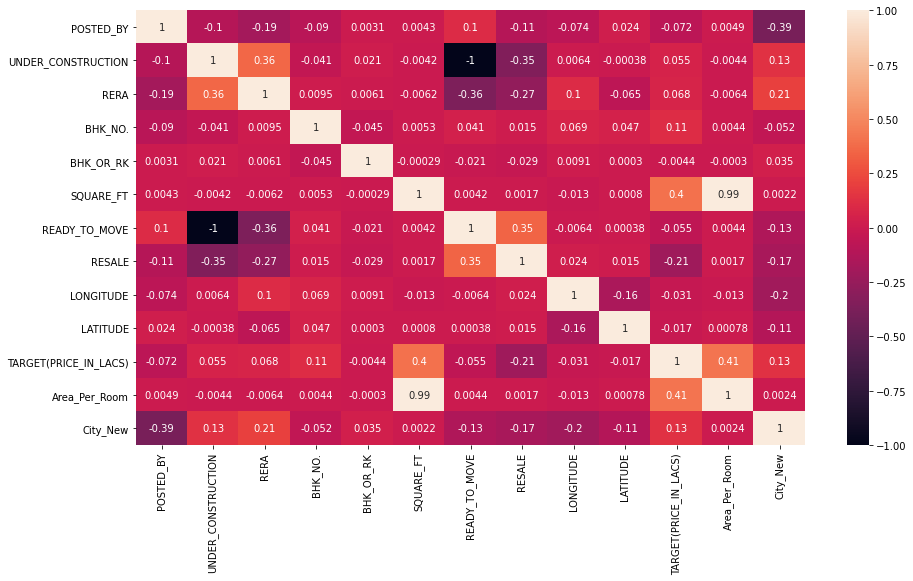

In [58]:
plt.figure(figsize=(15,8))
corr = data.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [59]:
X = data.drop('TARGET(PRICE_IN_LACS)',1)
y = data['TARGET(PRICE_IN_LACS)']

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [61]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True,normalize=True)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [62]:
y_pred = reg.predict(X_test)

In [63]:
from sklearn.metrics import mean_squared_log_error
results = np.sqrt(mean_squared_log_error(y_test,np.abs(y_pred)))
results

1.0617537987011287

In [64]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [65]:
dt_pred = dt.predict(X_test)

In [66]:
dt_results = np.sqrt(mean_squared_log_error(y_test,np.abs(dt_pred)))
dt_results

0.43424551128774846

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [68]:
rf_pred = rf.predict(X_test)

In [69]:
rf_results = np.sqrt(mean_squared_log_error(y_test,np.abs(rf_pred)))
rf_results

0.35990194665327946

In [70]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

[16:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [71]:
xgb_pred = xgb.predict(X_test)

In [72]:
xg_results = np.sqrt(mean_squared_log_error(y_test,np.abs(xgb_pred)))
xg_results

0.49910127178294145

In [73]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(max_depth=-1,n_estimators=1000, importance_type='gain')

In [74]:
lgb.fit(X_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='gain', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [75]:
lgb_pred = lgb.predict(X_test)

In [76]:
lgb_results = np.sqrt(mean_squared_log_error(y_test,np.abs(lgb_pred)))
lgb_results

0.4278385340986057

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor

In [ ]:
cb = CatBoostRegressor()
cb.fit(X_train,y_train)
cb_pred = cb.predict(X_test)

In [80]:
cb_results = np.sqrt(mean_squared_log_error(y_test,np.abs(cb_pred)))
cb_results

0.39134578788458996

In [150]:
test = pd.read_csv('Test.csv')

In [151]:
test['ADDRESS'] = test['ADDRESS'].apply(lambda x:special_char(x))

In [152]:
test['City'] = test['ADDRESS'].apply(lambda x: City(x))

In [153]:
test['Area_Per_Room'] = test['SQUARE_FT']/test['BHK_NO.']

In [154]:
test.drop('ADDRESS',1,inplace=True)

In [155]:
test['City_New'] = test['City'].map(j)
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,City,Area_Per_Room,City_New
0,Owner,0,0,1,BHK,545.171340,1,1,21.262000,73.047700,Surat,545.171340,61.189125
1,Dealer,1,1,2,BHK,800.000000,0,0,18.966114,73.148278,Lalitpur,400.000000,250.976879
2,Dealer,0,0,2,BHK,1257.096513,1,1,22.592200,88.484911,Kolkata,628.548257,99.807080
3,Dealer,0,0,3,BHK,1400.329489,1,1,26.988300,75.584600,Jaipur,466.776496,55.332848
4,Owner,0,0,1,BHK,430.477830,1,1,22.700000,72.870000,Nadiad,430.477830,20.440000


In [156]:
test.replace(to_replace=['Dealer','Owner','Builder'],value=[0,1,2],inplace=True)
test.replace(to_replace=['BHK','RK'],value=[0,1],inplace=True)

In [157]:
test.drop('City',1,inplace=True)

In [158]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,Area_Per_Room,City_New
0,1,0,0,1,0,545.171340,1,1,21.262000,73.047700,545.171340,61.189125
1,0,1,1,2,0,800.000000,0,0,18.966114,73.148278,400.000000,250.976879
2,0,0,0,2,0,1257.096513,1,1,22.592200,88.484911,628.548257,99.807080
3,0,0,0,3,0,1400.329489,1,1,26.988300,75.584600,466.776496,55.332848
4,1,0,0,1,0,430.477830,1,1,22.700000,72.870000,430.477830,20.440000


In [159]:
test.fillna(test['City_New'].mean(),inplace=True)

In [160]:
Final = test.iloc[:].values

In [161]:
test['TARGET(PRICE_IN_LACS)'] = model.predict(Final)

In [162]:
Results = np.abs(test['TARGET(PRICE_IN_LACS)'])

In [163]:
Results

0          265.179443
1          421.627563
2          738.809937
3          787.462036
4          200.190582
             ...     
68715      443.675171
68716     1356.102051
68717    20303.421875
68718      691.869812
68719     1470.836060
Name: TARGET(PRICE_IN_LACS), Length: 68720, dtype: float32

In [164]:
Results.to_csv('Results.csv',index=False)